<a href="https://colab.research.google.com/github/luca-gecchele/deep-hazel-machine/blob/main/PrimaBozzaGecchele.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Progettazione di modelli di Machine Learning per riconoscimento di *cultivar* di nocciole**

**Candidato**: Luca Gecchele

**Co-relatori**: Prof. Andrea Vandin e Prof. Matteo Dell'Acqua

**Tutor**: Prof. Luca Sebastiani

Questo Notebook è stato creato come supporto visivo per la presentazione in occasione della verifica annuale del percorso formativo.  

## Introduzione e EDA (*Exploratory Data Analysis*)

### Importare le librerie
Per lo studio sono state usate diverse librerie di Python, aperte a tutti. La presenza e la semplicità di utilizzo di tutte queste librerie hanno reso Python uno dei linguaggi di programmazione più popolari e usati al mondo.

In [ ]:
# %pip install pandas
# %pip install matplotlib.pyplot
# %pip install scipy

# Pandas è una potente libreria Python per la manipolazione e l'analisi dei dati, che offre strutture dati facili da usare e strumenti per gestirle. È essenziale per attività come la pulizia, la preparazione e l'esplorazione dei dati.
import pandas as pd
# Matplotlib è una libreria di visualizzazione grafica per Python, che fornisce strumenti per generare un'ampia gamma di visualizzazioni, come istogrammi, scatter plot, line plot, bar chart, e molto altro.
import matplotlib.pyplot as plt
# SciPy è una libreria per Python che fornisce funzioni e strumenti avanzati per il calcolo scientifico e tecnico, tra cui moduli per l'algebra lineare, l'ottimizzazione, l'integrazione, la statistica e l'elaborazione dei segnali.
from scipy import stats

### Importare il dataset
Dalla mia *repository* su Github carico il dataset, che è stato precedentemente assemblato unendo i dati ottenuti dalle analisi effettuate in laboratorio dal gruppo di ricerca del Professor Matteo Dell'Acqua e i dati ottenuti con metodi di OCR dalle immagini di nocciole rese disponibili.

In [ ]:
# Questo è il link al dataset contenuto nella mia repository di Github. È aperto a tutti.
url = "https://raw.githubusercontent.com/luca-gecchele/deep-hazel-machine/main/presentation_dataset.csv"

# read_csv() è una funzione di Pandas che legge un file CSV come un DataFrame, rendendo facile lavorare con dati in forma tabellare in Python.
# Per saperne di più sui DataFrames: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
data = pd.read_csv(url)

### Exploratory Data Analysis (EDA)
L'EDA (*Exploratory Data Analysis*, in italiano "Analisi Esplorativa dei Dati") è una fase preliminare dell'analisi dei dati che ha come obiettivo principale l'esplorazione, la comprensione e la sintesi delle caratteristiche principali di un dataset. L'EDA viene utilizzata per scoprire schemi, individuare anomalie o scovare relazioni interessanti tra le variabili.

In [ ]:
# La funzione head() in Pandas restituisce le prime righe di un DataFrame. Di default, mostra le prime 5 righe, ma è possibile specificare un numero diverso di righe da visualizzare.
print(data.head())

  tree_code     area_b         area_s     area_u  eccentricity_b  \
0   GE_TR00  104440.00  105940.250000  105062.50        0.490919   
1  GE_TR100  129016.50  127695.250000  137113.75        0.515044   
2   GE_TR46  122803.25  143605.750000  133130.00        0.647493   
3   GE_TR47  130539.75  130407.833333        NaN        0.576543   
4   GE_TR48  118395.75  134419.250000  137593.25        0.574508   

   eccentricity_s  eccentricity_u  ellipse_aspect_ratio_b  \
0        0.379443        0.561262                1.148649   
1        0.561570        0.478333                1.166699   
2        0.377218        0.489589                1.315240   
3        0.409089             NaN                1.224624   
4        0.401341        0.620015                1.224394   

   ellipse_aspect_ratio_s  ellipse_aspect_ratio_u  ...  Pentanol_T  Hexanol_M  \
0                1.086175                1.210636  ...         NaN        NaN   
1                1.223754                1.153898  ...        

In [ ]:
# La funzione shape() in Pandas restituisce un tuple che rappresenta le dimensioni del DataFrame, indicando il numero di righe e colonne.
print(data.shape)

(167, 141)


In [ ]:
# La funzione info() in Pandas fornisce un riepilogo conciso del DataFrame, mostrando informazioni come il numero di righe, il tipo di dati di ciascuna colonna, il numero di valori non nulli.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Columns: 141 entries, tree_code to Nut.circularity
dtypes: float64(140), object(1)
memory usage: 184.1+ KB
None


In [ ]:
# L'istruzione stampa una lista di tutte le colonne presenti nel DataFrame.
print(data.columns.tolist())

['tree_code', 'area_b', 'area_s', 'area_u', 'eccentricity_b', 'eccentricity_s', 'eccentricity_u', 'ellipse_aspect_ratio_b', 'ellipse_aspect_ratio_s', 'ellipse_aspect_ratio_u', 'ellipse_center_0_b', 'ellipse_center_0_s', 'ellipse_center_0_u', 'ellipse_center_1_b', 'ellipse_center_1_s', 'ellipse_center_1_u', 'hu_moment_0_b', 'hu_moment_0_s', 'hu_moment_0_u', 'hu_moment_1_b', 'hu_moment_1_s', 'hu_moment_1_u', 'hu_moment_2_b', 'hu_moment_2_s', 'hu_moment_2_u', 'hu_moment_3_b', 'hu_moment_3_s', 'hu_moment_3_u', 'hu_moment_4_b', 'hu_moment_4_s', 'hu_moment_4_u', 'hu_moment_5_b', 'hu_moment_5_s', 'hu_moment_5_u', 'hu_moment_6_b', 'hu_moment_6_s', 'hu_moment_6_u', 'kurtMaj_b', 'kurtMaj_s', 'kurtMaj_u', 'kurtMin_b', 'kurtMin_s', 'kurtMin_u', 'lenMaj_b', 'lenMaj_s', 'lenMaj_u', 'lenMin_b', 'lenMin_s', 'lenMin_u', 'major_axis_b', 'major_axis_s', 'major_axis_u', 'max_ax_length_b', 'max_ax_length_s', 'max_ax_length_u', 'minor_axis_b', 'minor_axis_s', 'minor_axis_u', 'perimeter_b', 'perimeter_s', 'p

In [ ]:
# L'operazione restituisce le prime cinque righe delle colonne che contengono dati di tipo non numerico (tipo "object").
non_numeric_columns = data.select_dtypes(include=['object']).columns.tolist()
print(data[non_numeric_columns].head())

  tree_code
0   GE_TR00
1  GE_TR100
2   GE_TR46
3   GE_TR47
4   GE_TR48


Il dataset è composto da 141 colonne (di cui solo una contiene un tipo non numerico), che rappresentano le nostre variabili. Come si può osservare, le prime colonne sembrano essere "triplicate", perché hanno lo stesso nome (ad esempio, ci sono tre colonne contenenti la parola "area"). In realtà, sono state create tre colonne che contengono la media dei valori di tutte le nocciole raccolte da un singolo albero che sono state posizionate con lo stesso orientamento nell'immagine. Le nocciole sono infatti viste dall'alto, dal basso oppure di lato, e si è preferito discriminare questi tre orientamenti per evitare di creare artefatti.

Il dataset è composto altresì da 167 righe, ovvero 167 osservazioni. In questo caso, ciascuna osservazione è un albero, identificato in modo univoco dal valore della colonna `tree_code` (ad esempio, `GE_TR00` indica l'albero coltivato in Georgia numero 00), che è anche l'unica colonna di tipo non numerico.

#### Statistica descrittiva
La statistica descrittiva (o *summary statistics*) è un insieme di metodi utilizzati per riassumere e descrivere le caratteristiche principali di un insieme di dati, come la tendenza centrale, la dispersione e la distribuzione. Questi metodi includono misure come la media, la mediana, la moda, la varianza e i percentili.

In [ ]:
# La funzione describe() in Pandas genera un riepilogo delle statistiche descrittive per le colonne numeriche di un DataFrame, come la media, la deviazione standard, i valori minimo e massimo, e i quartili. Può anche essere utilizzata per ottenere statistiche sulle colonne specificandole nell'argomento.

# Restituisce summary statistics dell'intero dataset.
print(data.describe())

# Restituisce summary statistics solo della colonna prescelta (in questo esempio, "Benzaldehyde_M").
# print(data['Benzaldehyde_M'].describe())

              area_b         area_s         area_u  eccentricity_b  \
count     166.000000     167.000000     165.000000      166.000000   
mean    95843.587349  102225.298653   95206.794697        0.537367   
std     23738.459470   21641.679633   24740.703058        0.078218   
min     45547.500000   51555.500000   48407.000000        0.273061   
25%     79089.562500   86889.812500   77488.000000        0.496299   
50%     91402.000000   96419.625000   89766.750000        0.538127   
75%    109624.687500  116846.000000  111897.000000        0.589125   
max    180945.250000  172126.250000  173408.000000        0.707662   

       eccentricity_s  eccentricity_u  ellipse_aspect_ratio_b  \
count      167.000000      165.000000              166.000000   
mean         0.455055        0.549488                1.200946   
std          0.111517        0.068491                0.071999   
min          0.262644        0.289161                1.043598   
25%          0.380880        0.506499       

#### Analisi delle distribuzioni e gestione degli *outliers*
Studiare la distribuzione di ciascuna variabile permette di identificare la presenza di valori anomali (*outliers*), la simmetria o asimmetria della distribuzione, e la forma generale (come la normalità, la multimodalità, o la presenza di code lunghe). Questo tipo di analisi aiuta a valutare la necessità di trasformazioni successive.

In [ ]:
# L'operazione filtra il DataFrame mantenendo solo le colonne con dati di tipo numerico, escludendo colonne con dati di tipo non numerico (come tree_code).
distribution_data = data.select_dtypes(include='number')

In [ ]:
# La funzione show_histograms() prende come input un dataset e restituisce un istogramma per ciascuna variabile. Il parametro columns_per_row determina il numero di colonne da visualizzare per riga (il valore di default è impostato a 12).
def show_histograms(data, columns_per_row=12):
    # Calcola il numero di righe necessarie
    rows = (data.shape[1] // columns_per_row) + (data.shape[1] % columns_per_row > 0)
    # Crea una figura con la griglia specificata
    fig, axes = plt.subplots(rows, columns_per_row, figsize=(20, rows * 3)) # dimensione della figura (larghezza, altezza)
    # Appiattisci l'array di assi per iterare facilmente su di essi
    axes = axes.flatten()

    # Itera attraverso le colonne del DataFrame e crea il plot
    for i, col in enumerate(data.columns):
        ax = axes[i]
        ax.hist(data[col].dropna(), bins=20, color='skyblue', edgecolor='black') # Istogramma per ciascuna colonna
        ax.set_title(col) # Titolo con il nome della colonna
        ax.set_yticks([]) # Opzionale: Nasconde le etichette sull'asse y per una visualizzazione più pulita

    # Nascondi gli assi vuoti rimanenti se le colonne non sono un multiplo di 12
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

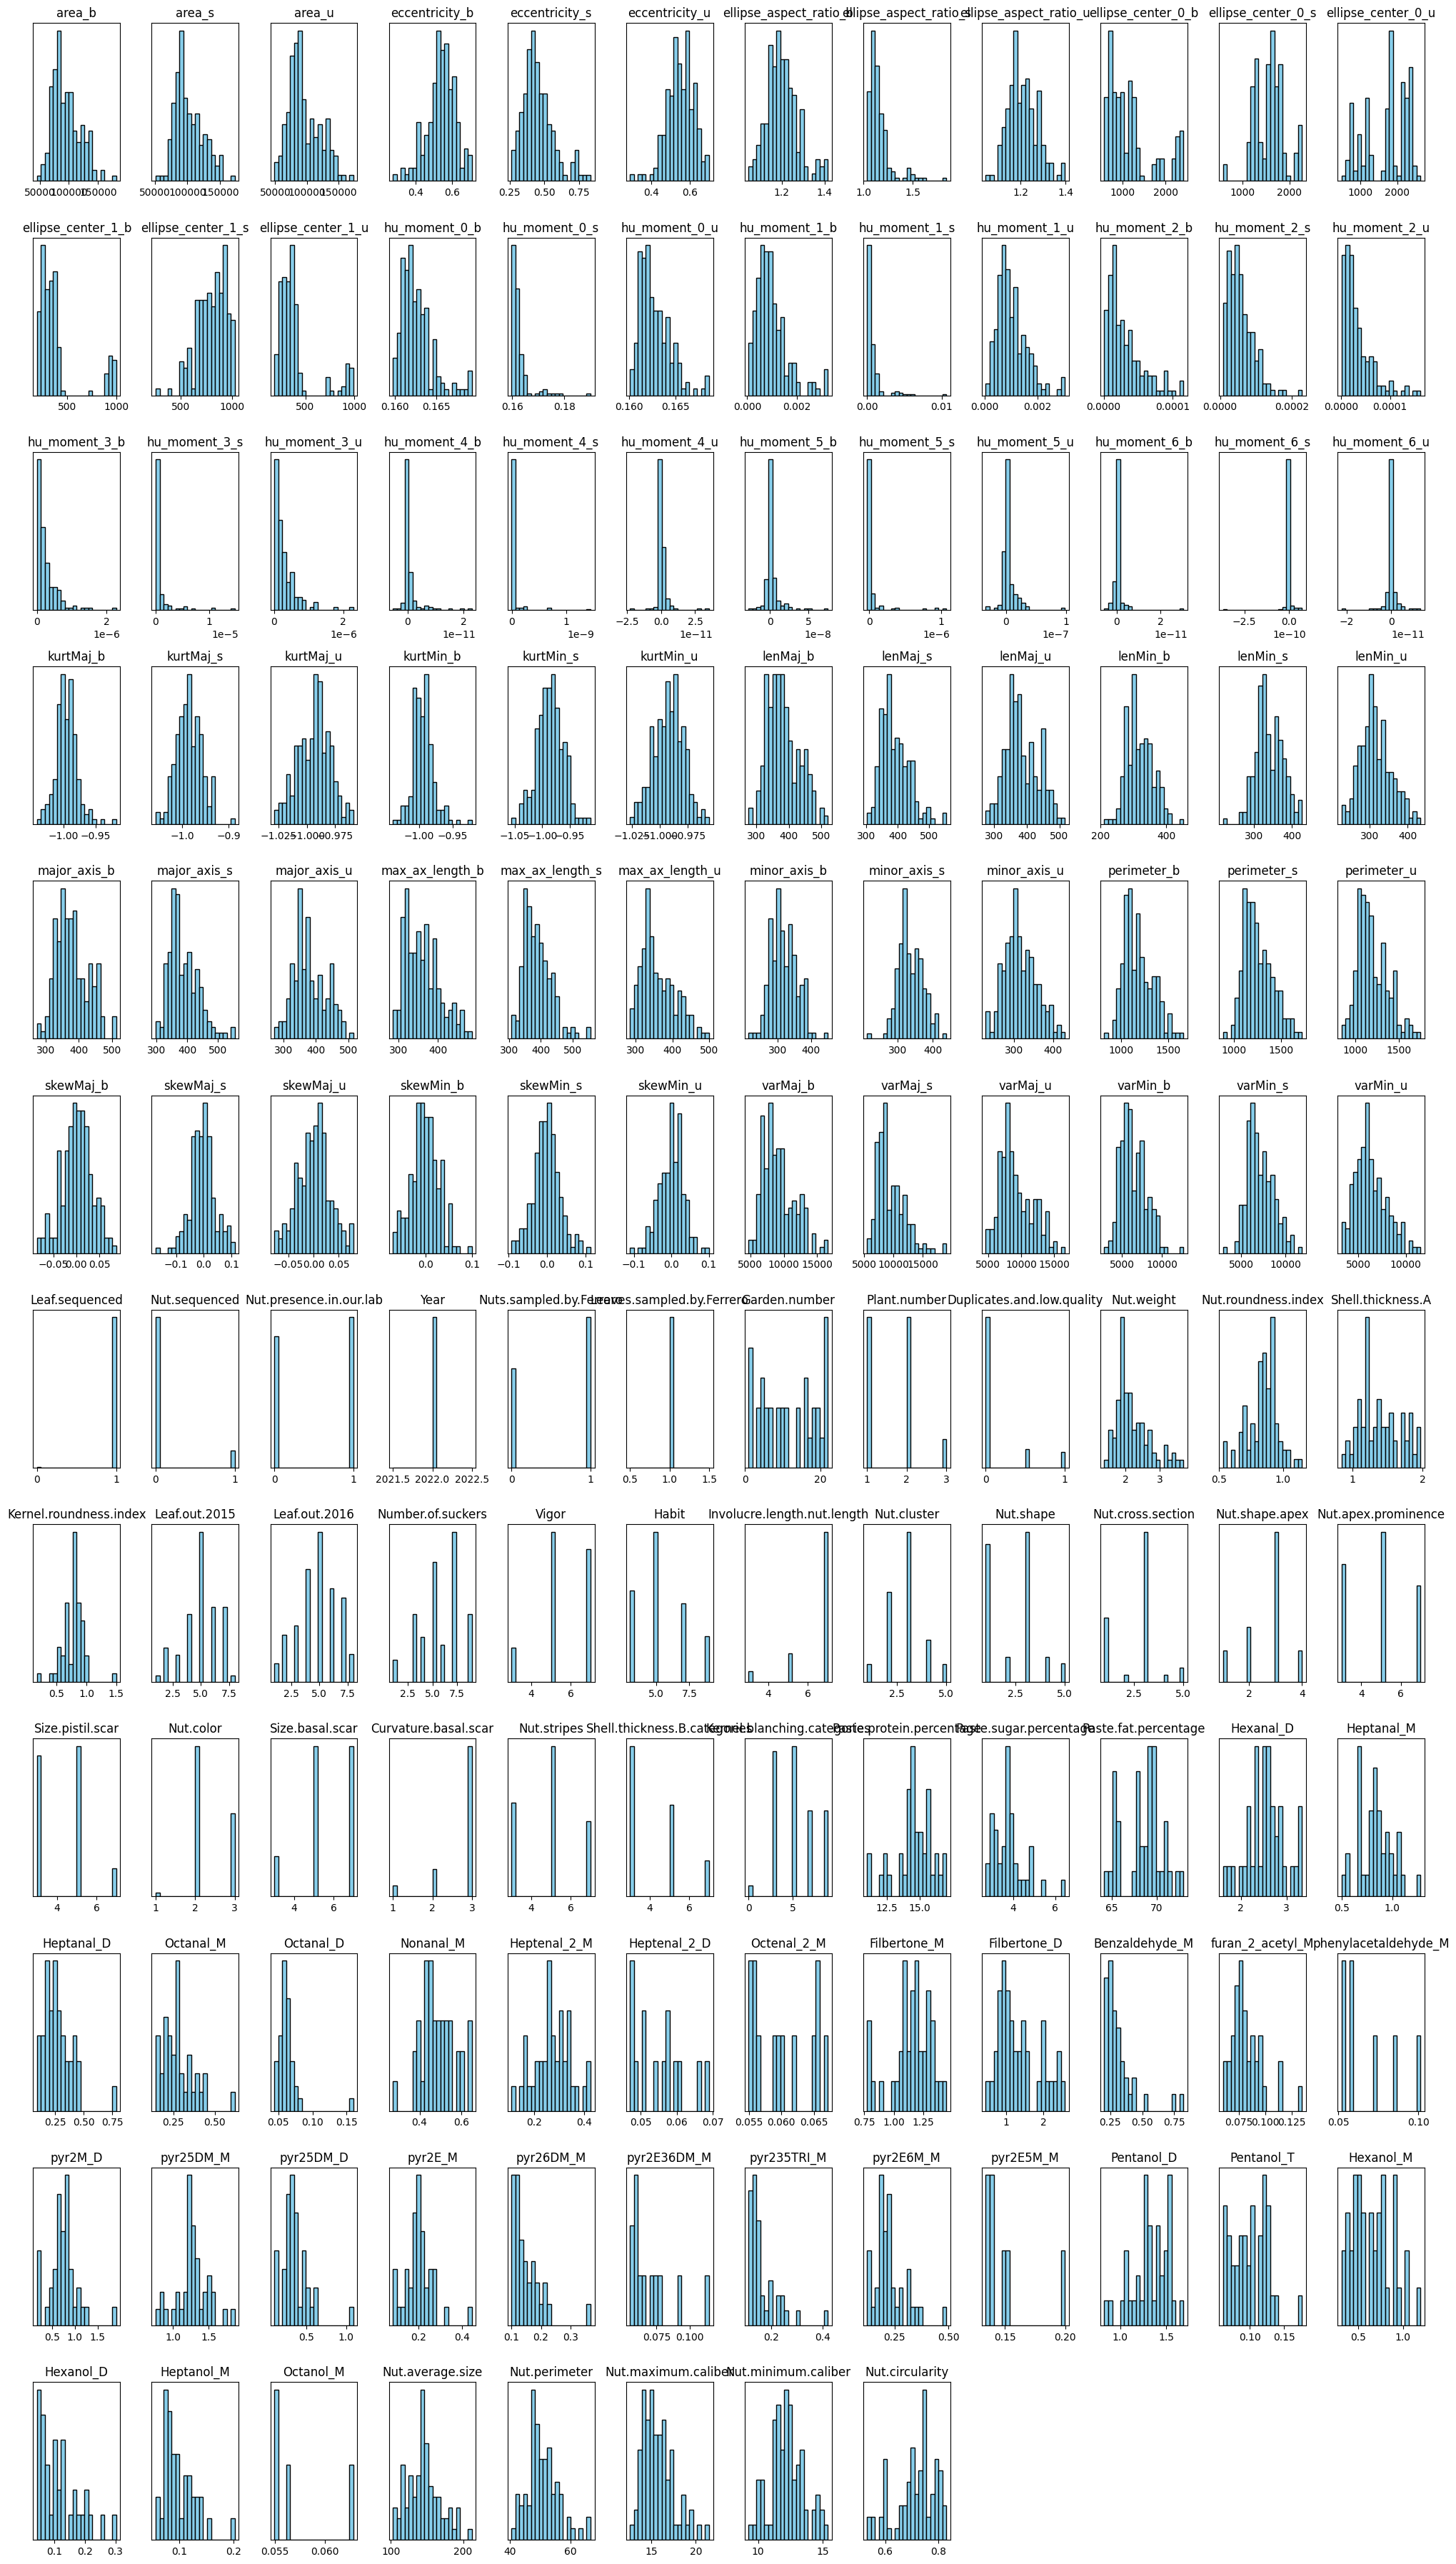

In [ ]:
# Restituisce istogrammi raggruppati su 12 colonne delle distribuzioni delle variabili non modificate.
show_histograms(distribution_data, 12)

Per calcolare gli *outliers* si può utilizzare il metodo IQR o il metodo *z*-score.

Il metodo *z*-Score calcola quanto una osservazione si discosta dalla media in termini di deviazione standard. Un valore assoluto di *z*-Score maggiore di 3 è spesso considerato un *outlier*.

In [ ]:
# La funzione calculate_zscore() prende come input un dataset, un parametro zscore_threshold (default = 3) che rappresenta la soglia di deviazioni standard oltre la quale un valore è considerato outlier e un parametro column_threshold (default = 3) che rappresenta il valore soglia che viene utilizzato come discriminante per rimuovere le righe: almeno un numero di colonne pari al valore soglia deve avere outlier per determinare l'eliminazione della riga. Restituisce il dataset "filtrato".
def calculate_zscore(data, zscore_threshold=3, column_threshold=3):
    # Calcola lo Z-Score per ogni colonna numerica
    z_scores = data.apply(stats.zscore)
    # Identifica quali valori superano la soglia e sono quindi considerati outlier
    outlier_boolean = (z_scores.abs() > zscore_threshold)
    # Conta il numero di colonne in cui ogni riga è considerata un outlier
    outlier_per_row = outlier_boolean.sum(axis=1)
    # Crea un filtro per mantenere solo le righe che non sono outlier in almeno 3 colonne
    filter_no_outlier = outlier_per_row < column_threshold
    # Applica il filtro al DataFrame originale
    without_outlier_data = data[filter_no_outlier]

    return without_outlier_data

In [ ]:
# Stampa a schermo il numero di righe che non sono state filtrate da z-score, per ogni valore soglia che indica quante colonne devono avere outlier per determinare l'eliminazione della riga.
for i in range(1, 10, 1):
    without_outlier_data = calculate_zscore(distribution_data, 3, i)
    print(f"Numero di righe dopo la rimozione degli outlier (valore soglia = {i}): {len(without_outlier_data)}")

Numero di righe dopo la rimozione degli outlier (valore soglia = 1): 153
Numero di righe dopo la rimozione degli outlier (valore soglia = 2): 159
Numero di righe dopo la rimozione degli outlier (valore soglia = 3): 160
Numero di righe dopo la rimozione degli outlier (valore soglia = 4): 162
Numero di righe dopo la rimozione degli outlier (valore soglia = 5): 162
Numero di righe dopo la rimozione degli outlier (valore soglia = 6): 163
Numero di righe dopo la rimozione degli outlier (valore soglia = 7): 166
Numero di righe dopo la rimozione degli outlier (valore soglia = 8): 166
Numero di righe dopo la rimozione degli outlier (valore soglia = 9): 166


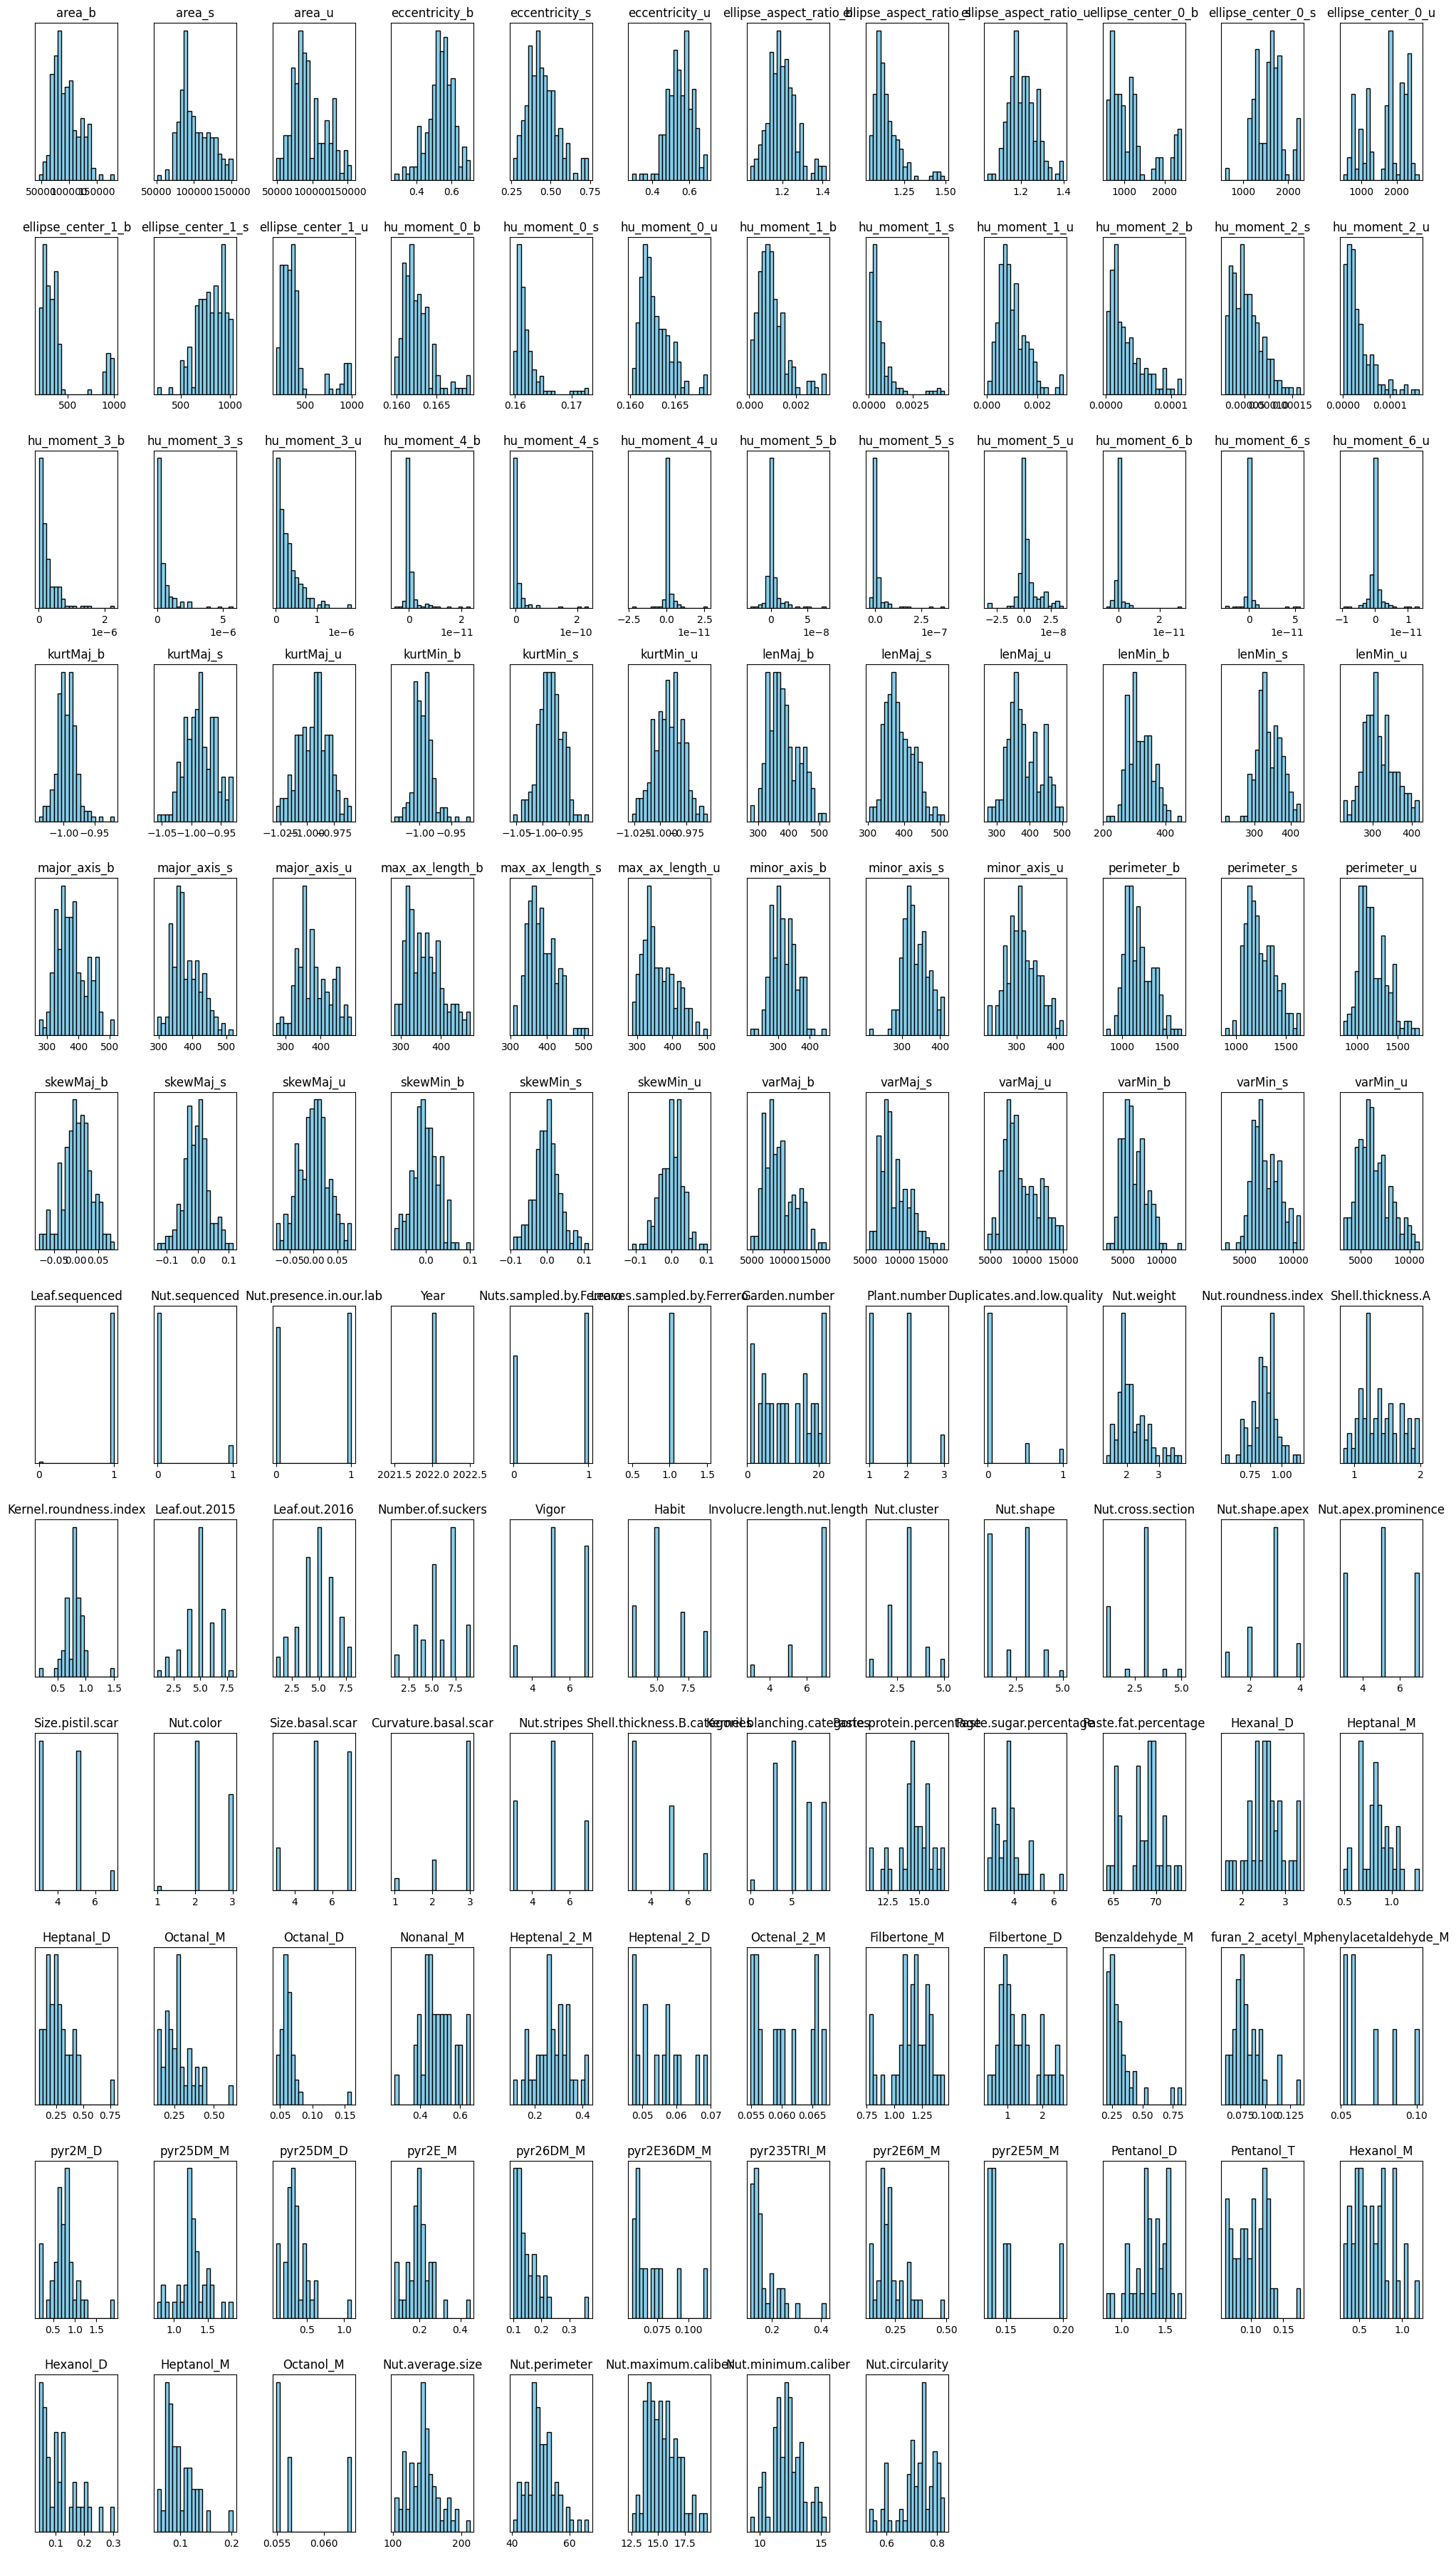

In [ ]:
# Restituisce istogrammi raggruppati su 12 colonne delle distribuzioni delle variabili modificate in seguito a z-score effettuato con valore soglia uguale a 3.
without_outlier_data = calculate_zscore(distribution_data, 3, 3)
show_histograms(without_outlier_data, 12)

Scegliendo 3 come valore soglia (del numero di colonne che devono presentare *outlier* per comportare l'eliminazione della riga), vengono scartate 7 osservazioni, per cui il dataset viene ridotto a 160 righe. Dal raffronto dei due grafici, si osserva che a beneficiare maggiormente di questa rimozione sono variabili come Hu Moments, che presentano in questo caso di una distribuzione più ristretta.

#### Come trattare i dati mancanti

In [ ]:
# La funzione count() in Pandas calcola il numero di valori non nulli per ogni colonna di un DataFrame o per una Serie specifica. È utile per determinare rapidamente quante osservazioni valide sono presenti in ciascuna colonna, escludendo i valori mancanti.
var = 'Benzaldehyde_M'
print("Il numero di osservazioni non nulle per la variabile {var} è {num}.".format(var=var, num=data[var].count()))

Il numero di osservazioni non nulle per la variabile Benzaldehyde_M è 39.


Come si può verificare dall'osservazione delle *summary statistics* del dataset (l'esempio sopra è rappresentativo),

#### Normalizzazione

#### Analisi della correlazione